## Anova(Analysis of Variance)

We will start with a data set to analyze different brands of insect spray. The default data set is named `InsectSprays` and has the counts of insects  in agricultural experimental units treated with different insecticides. It has 72 observations of 6 insecticides. 

In [1]:
data(InsectSprays)
InsectSprays

count,spray
<dbl>,<fct>
10,A
7,A
20,A
14,A
14,A
12,A
10,A
23,A
17,A


First, plot the boxplots: 

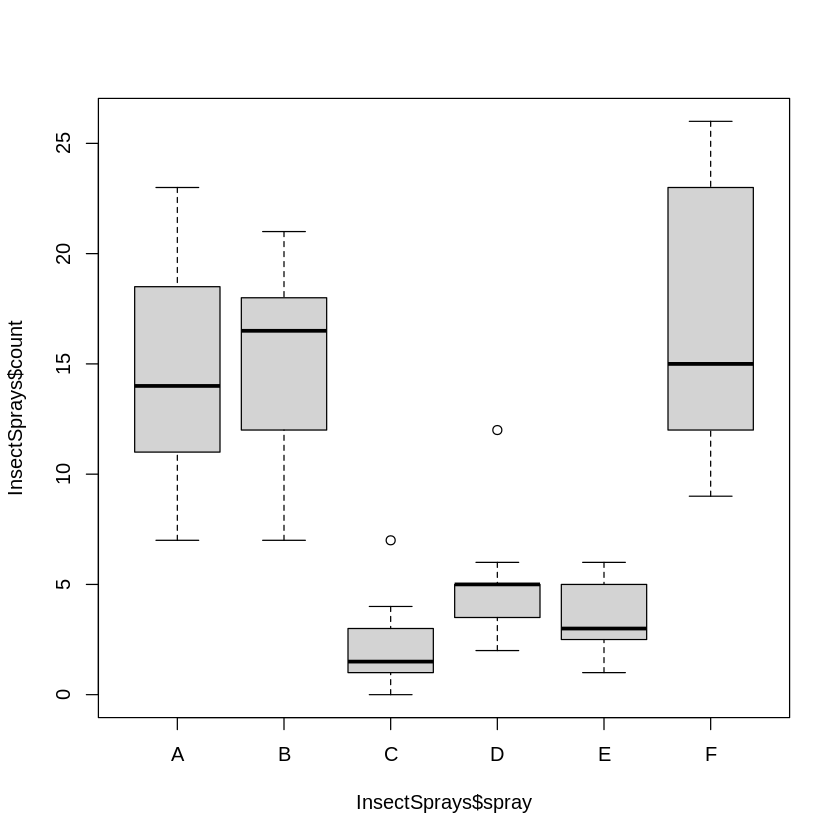

In [2]:
boxplot(InsectSprays$count~InsectSprays$spray)

In [3]:
with(InsectSprays, tapply(count,spray,mean))

A         B         C         D         E         F 
14.500000 15.333333  2.083333  4.916667  3.500000 16.666667

We want to see if there are significant differences with respect to spray. We use a one-way ANOVA.

**YOUR TURN:**

In [5]:
s.model <- aov(count ~ spray, data = InsectSprays)
summary(s.model)

            Df Sum Sq Mean Sq F value Pr(>F)    
spray        5   2669   533.8    34.7 <2e-16 ***
Residuals   66   1015    15.4                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The P-value is very small, we reject the null hypothesis that group means are equal. Now, let's see which groups are significantly different: 


In [6]:
TukeyHSD(s.model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = count ~ spray, data = InsectSprays)

$spray
           diff        lwr       upr     p adj
B-A   0.8333333  -3.866075  5.532742 0.9951810
C-A -12.4166667 -17.116075 -7.717258 0.0000000
D-A  -9.5833333 -14.282742 -4.883925 0.0000014
E-A -11.0000000 -15.699409 -6.300591 0.0000000
F-A   2.1666667  -2.532742  6.866075 0.7542147
C-B -13.2500000 -17.949409 -8.550591 0.0000000
D-B -10.4166667 -15.116075 -5.717258 0.0000002
E-B -11.8333333 -16.532742 -7.133925 0.0000000
F-B   1.3333333  -3.366075  6.032742 0.9603075
D-C   2.8333333  -1.866075  7.532742 0.4920707
E-C   1.4166667  -3.282742  6.116075 0.9488669
F-C  14.5833333   9.883925 19.282742 0.0000000
E-D  -1.4166667  -6.116075  3.282742 0.9488669
F-D  11.7500000   7.050591 16.449409 0.0000000
F-E  13.1666667   8.467258 17.866075 0.0000000


As we could guess from the boxplots, brands A, B, and F do not significantly differ from each other, and brands C, D, and E also do not significantly from each other; but these two groups (A,B,F and C,D,E) significantly differ from each other pair-wise (e.g. A-C is different, F-D is different, etc.). 

---

**YOUR TURN:**

A company is applying a sensory test for a set of 15 panelists in three different brands of chocolate. Three brands are compared, one being the reference, and the goal is to verify the difference of scores with the control. In this experiment, we have two factors: the brand and the tasters, and we hope that there is no significant effect of tasters. At each assessment, the assessor must determine the difference on a scale 0-7.

In [7]:
Taste_test <- data.frame(
  Taste =
  c(5, 7, 3,
    4, 2, 6,
    5, 3, 6,
    5, 6, 0,
    7, 4, 0,
    7, 7, 0,
    6, 6, 0,
    4, 6, 1,
    6, 4, 0,
    7, 7, 0,
    2, 4, 0,
    5, 7, 4,
    7, 5, 0,
    4, 5, 0,
    6, 6, 3
  ),
Type = factor(rep(c("A", "B", "C"), 15)),
Taster = factor(rep(1:15, rep(3, 15))))
head(Taste_test)

,Taste,Type,Taster
,<dbl>,<fct>,<fct>
1,5,A,1
2,7,B,1
3,3,C,1
4,4,A,2
5,2,B,2
6,6,C,2


In [8]:
tapply(Taste_test$Taste, Taste_test$Type, mean)

A        B        C 
5.333333 5.266667 1.533333

**Run a two-way ANOVA test using Type and Taster as factors WITHOUT interaction:** 

In [11]:
t.model <- aov(Taste ~ Type + Taster, data = Taste_test)
summary(t.model)
anova(t.model)

            Df Sum Sq Mean Sq F value  Pr(>F)    
Type         2 141.91   70.96   19.21 5.6e-06 ***
Taster      14  32.58    2.33    0.63   0.818    
Residuals   28 103.42    3.69                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Type,2,141.91111,70.955556,19.2101418,5.597605e-06
Taster,14,32.57778,2.326984,0.6299957,8.175058e-01
Residuals,28,103.42222,3.693651,NA,NA


From the output, you should see that the p-value is 0.8175 for tasters indicating that the assessors have no significant effect on the response. This is desirable since it is expected that the testers can discern correctly. Also, in the table we see that the ANOVA p-value for the type of chocolate is highly significant, indicating the difference between the scores. So from now on, we can make the Tukey test to see where the differences lie.

In [12]:
TukeyHSD(t.model, which="Type")  # we want to only see the differences for Type variable 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Taste ~ Type + Taster, data = Taste_test)

$Type
           diff       lwr       upr     p adj
B-A -0.06666667 -1.803101  1.669768 0.9950379
C-A -3.80000000 -5.536435 -2.063565 0.0000260
C-B -3.73333333 -5.469768 -1.996899 0.0000337


This output indicates that the differences C-A and C-B are significant , while B-A is not significant. A more “easy” way to interpret this output is visualizing the confidence intervals for the mean differences.


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




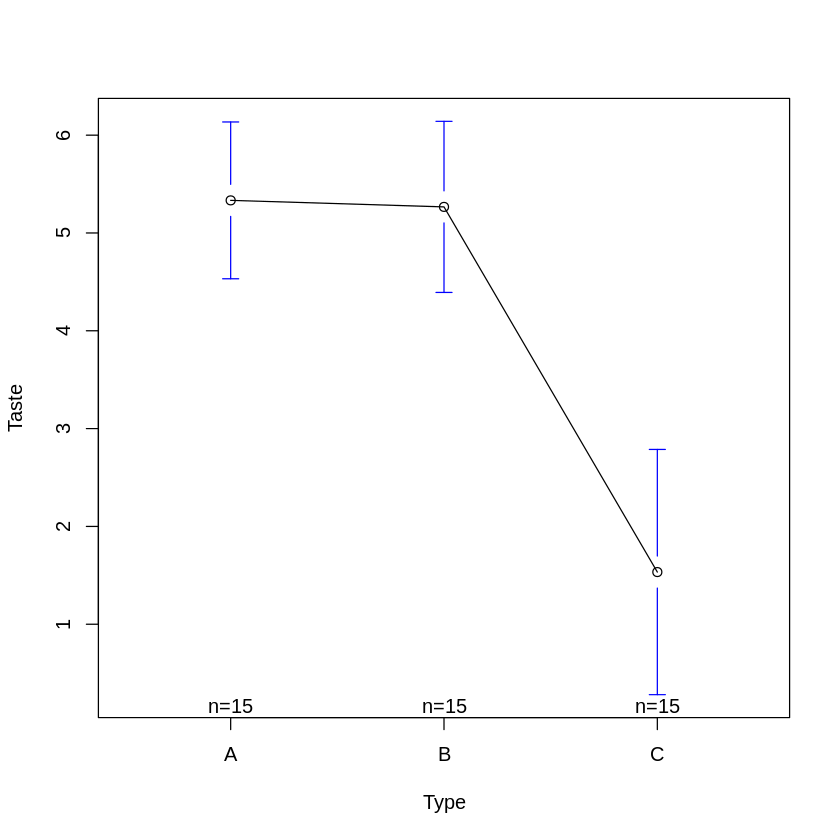

In [13]:
library(gplots) # plot means with error bars 

plotmeans(Taste~Type, data=Taste_test)


---

In the "Bias Against Associates of the Obese" case study, 
the researchers were interested in whether the weight of a companion of a job applicant 
would affect judgments of a male applicant's qualifications for a job. 
Two independent variables were investigated: 
(1) whether the companion was obese or of typical weight, 
(2) whether the companion was a girlfriend or just an acquaintance. 

One approach could have been to conduct two separate studies, one with each independent variable. 
However, it is more efficient to conduct one study that includes both independent variables. 
Moreover, there is a much bigger advantage than efficiency for including two variables in the same study: 
it allows a test of the **interaction** between the variables. 
There is an interaction when the effect of one variable differs depending on the level of a second variable. 
For example, it is possible that the effect of having an obese companion would differ depending on the relationship to the companion. 
Perhaps there is more prejudice against a person with an obese companion if the companion is a girlfriend 
than if she is just an acquaintance. 
If so, there would be an interaction between the obesity factor and the relationship factor.

There are three effects of interest in this experiment:

**Weight:** Are applicants judged differently depending on the weight of their companion?

**Relationship:** Are applicants judged differently depending on their relationship with their companion?

**Weight x Relationship Interaction:** Does the effect of weight differ depending on the relationship with the companion?

We will apply ANOVA to study these effects. 

In [14]:
# Read the data
weight=read.csv("/dsa/data/all_datasets/weight/weight.csv")

str(weight)
# WEIGHT and RELATE are factors
weight$WEIGHT=as.factor(weight$WEIGHT)
weight$RELATE=as.factor(weight$RELATE)
head(weight)

'data.frame':	176 obs. of  3 variables:
 $ WEIGHT  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ RELATE  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ QUALIFID: int  7 5 7 5 7 7 3 7 7 5 ...


,WEIGHT,RELATE,QUALIFID
,<fct>,<fct>,<int>
1,1,1,7
2,1,1,5
3,1,1,7
4,1,1,5
5,1,1,7
6,1,1,7


Descriptions of the variables:

**Weight:** The weight of the woman sitting next to the job applicant; 1 = obese, 2 = average weight.

**Relate:** Type of relationship between the job applicant and the woman seated next to him: 1 = girlfriend, 2 = acquaintance.

**Qualifid:** Larger numbers represent higher professional qualification ratings.

Let's see if the mean qualification score differs with respect to companion's weight. 
We'll plot the group means.

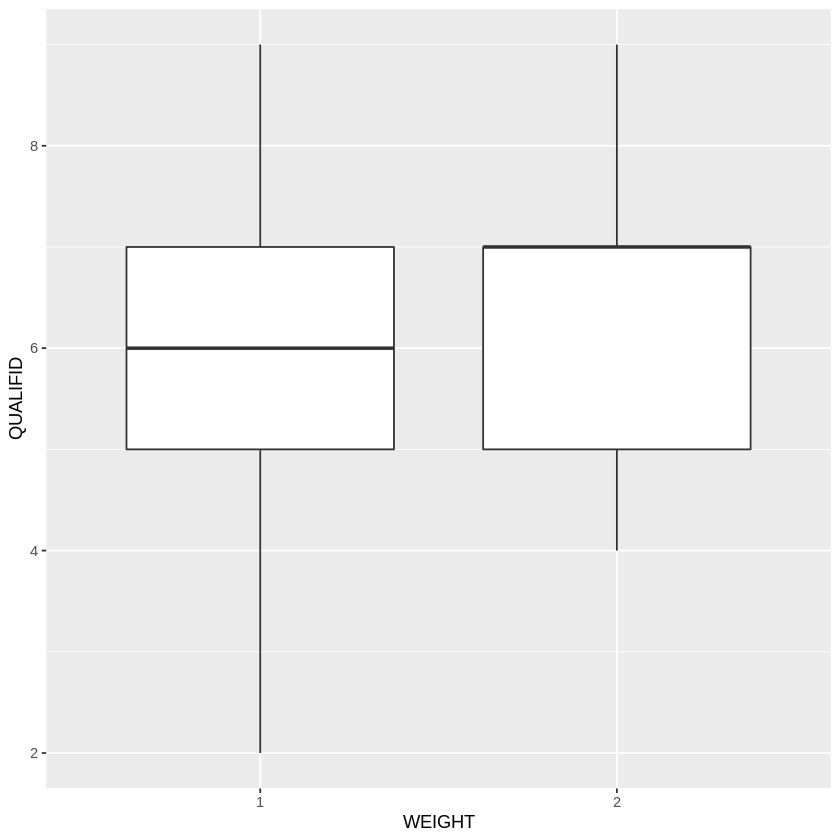

In [15]:
library(ggplot2)
ggplot(weight,aes(WEIGHT,QUALIFID))+geom_boxplot()

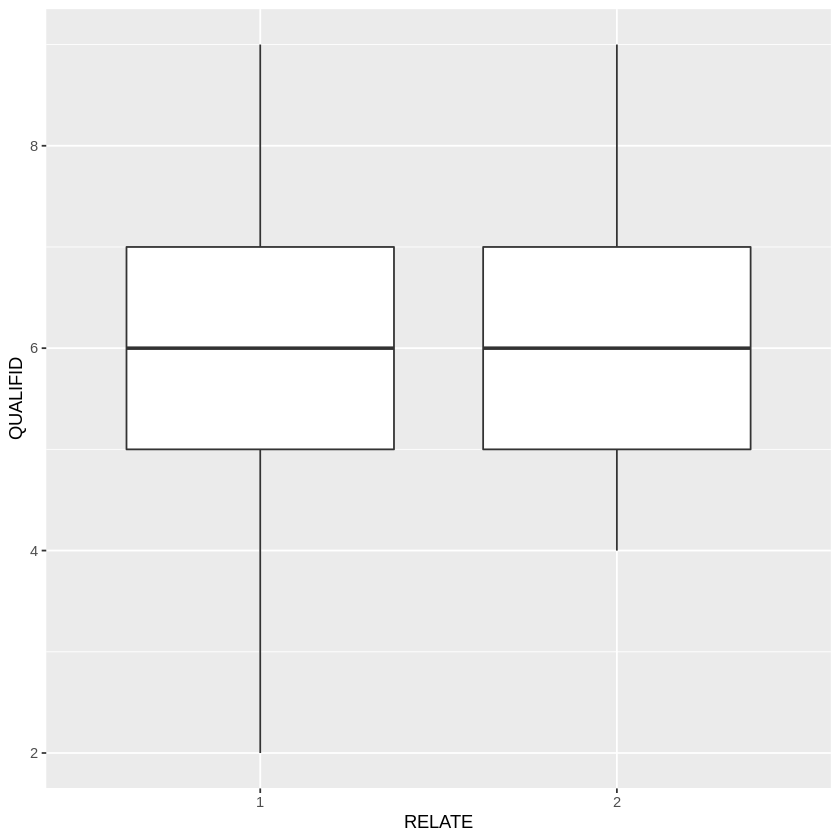

In [16]:
# Also, plot the group means for RELATE 
ggplot(weight,aes(RELATE,QUALIFID))+geom_boxplot()

From the plots above, it seems like WEIGHT has somewhat an effect on perceived qualification; 
RELATE does not seem to have an effect. 
Let's run ANOVA and see if these hypotheses hold.

In [17]:
# run ANOVA
fit1 <- aov(QUALIFID ~ WEIGHT + RELATE, data=weight)
summary(fit1)
anova(fit1)

             Df Sum Sq Mean Sq F value  Pr(>F)   
WEIGHT        1  11.65  11.648   6.953 0.00913 **
RELATE        1   8.72   8.716   5.203 0.02377 * 
Residuals   173 289.82   1.675                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
WEIGHT,1,11.648485,11.648485,6.953311,0.009128044
RELATE,1,8.716332,8.716332,5.203026,0.023766921
Residuals,173,289.817001,1.675243,NA,NA


ANOVA results show that WEIGHT has an effect. 
The p-value is 0.009 and therefore the null hypothesis of no main effect of WEIGHT is rejected. 
The conclusion is that being accompanied by an obese companion lowers judgments of qualifications. 
The effect of RELATE is not as significant but we can't readily reject the null hypothesis either. 
The conclusion is that being accompanied by a girlfriend leads to somewhat lower ratings than being accompanied by an acquaintance.

Let's see if there is interaction between these two independent variables. 

**YOUR TURN:**

In [19]:
# run ANOVA WITH interaction
fit2 <- aov(QUALIFID ~ WEIGHT * RELATE, data = weight)
summary(fit2)
anova(fit2)

               Df Sum Sq Mean Sq F value  Pr(>F)   
WEIGHT          1  11.65  11.648   6.916 0.00932 **
RELATE          1   8.72   8.716   5.175 0.02415 * 
WEIGHT:RELATE   1   0.10   0.104   0.062 0.80427   
Residuals     172 289.71   1.684                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
WEIGHT,1,11.6484848,11.6484848,6.91559516,0.009319404
RELATE,1,8.7163324,8.7163324,5.17480400,0.024151453
WEIGHT:RELATE,1,0.1037734,0.1037734,0.06160931,0.804266299
Residuals,172,289.7132275,1.6843792,NA,NA


The p-value for the interaction is 0.8, 
which is the probability of getting an interaction as big or bigger than the one obtained 
in the experiment if there were no interaction in the population. 
Therefore, these data provide no evidence for an interaction.

---

Let's apply the same analysis to the kc_house_data that we have seen before. 

In [20]:
hs <- read.csv("/dsa/data/all_datasets/house_sales_in_king_county/kc_house_data.csv",header=TRUE)
head(hs)
str(hs)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : chr  "20141013T000000" "20141209T000000" "20150225T000000" "20141209T000000" ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovated :

In [21]:
# these are factors
hs$bedrooms = as.factor(hs$bedrooms)
hs$floors = as.factor(hs$floors)

Let's see if price is effected by number of bedrooms and number of floors; and also see if there is interaction between the two.

**YOUR TURN:**

In [22]:
fit3 <- aov(price ~ bedrooms * floors, data = hs)
summary(fit3)

                   Df    Sum Sq   Mean Sq F value Pr(>F)    
bedrooms           12 3.103e+14 2.586e+13  232.94 <2e-16 ***
floors              5 1.461e+14 2.921e+13  263.11 <2e-16 ***
bedrooms:floors    33 6.280e+13 1.903e+12   17.14 <2e-16 ***
Residuals       21562 2.394e+15 1.110e+11                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

As we can see, both variables have a significant effect and there is interaction between them 
(we would expect that). 

Let's see how we can apply MANOVA to this data set. 
We'd like to see if there is a relation between price and location. 
We will use the price as the independent variable and see if it has an effect on the location 
(usually the other way around makes more sense). 
Here we use "lat" and "long" as the coordinates of the location; so we need to bind them in order to apply MANOVA. 

In [23]:
fit4 <- aov(cbind(lat, long) ~ price, data = hs)
summary(fit4)

 Response lat :
               Df Sum Sq Mean Sq F value    Pr(>F)    
price           1  39.11  39.109  2248.8 < 2.2e-16 ***
Residuals   21611 375.84   0.017                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response long :
               Df Sum Sq  Mean Sq F value   Pr(>F)   
price           1   0.20 0.200464  10.112 0.001475 **
Residuals   21611 428.42 0.019824                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


The price has more effect on lattitude than longitude (we know why from a previous practice); 
the p-value for lattitude is almost zero whereas the p-value for longitude is 0.0015 which suggests good significance. 

# Save your notebook!